<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/Multilabel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -q http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar

In [2]:
!tar -xvf VOCtrainval_06-Nov-2007.tar > /dev/null; echo " done."


 done.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers,models
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image

In [5]:
df = pd.read_pickle("multi.csv")
df.shape

(2501, 2)

In [6]:
df.head()

,fn,cat_id
0,000012.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,000017.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,000023.jpg,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,000026.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,000032.jpg,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [0]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']

In [8]:
len(voc_classes)

20

In [0]:
import os

In [0]:
img_folder = "/content/VOCdevkit/VOC2007/JPEGImages/"
x = []
y = []
for i in range(df.shape[0]):
  img_name = df['fn'][i]
  label = df['cat_id'][i]
  img=image.load_img(img_folder+img_name,target_size=(200,200))
  img = image.img_to_array(img)
  x.append(img)
  y.append(label)


In [53]:
import numpy as np
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(2501, 200, 200, 3)
(2501, 20)


In [12]:
y[0:3,:]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [0]:
input_layer = layers.Input(shape=(200,200,3))
res_model = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)

# freezing all layers except last few layers
for layer in res_model.layers[:-2]:
  layer.trainable=False

#adding more layers at the end
last_layer = res_model.layers[-1].output
L1 = layers.Flatten()(last_layer)
L2 = layers.Dropout(0.3)(L1)
L3 = layers.Dense(1024,activation='relu')(L2)
L4 = layers.Dropout(0.3)(L3)
L5 = layers.Dense(256,activation='relu')(L4)
L6 = layers.Dropout(0.3)(L5)

output_layer = layers.Dense(20,activation='sigmoid')(L6)

model = models.Model(inputs=input_layer,outputs=output_layer)

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
x.shape

(2501, 200, 200, 3)

In [0]:
#from sklearn.model_selection import train_test_split
#xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)

In [58]:
#train the model
model.fit(x,y,epochs=10,batch_size=64,validation_split=0.2,shuffle=True)

Epoch 1/10
32/32 [==============================] - 5s 151ms/step - loss: 1.9619 - accuracy: 0.2280 - val_loss: 0.2642 - val_accuracy: 0.4092
Epoch 2/10
32/32 [==============================] - 4s 126ms/step - loss: 0.4047 - accuracy: 0.4180 - val_loss: 0.1786 - val_accuracy: 0.4890
Epoch 3/10
32/32 [==============================] - 4s 127ms/step - loss: 0.2262 - accuracy: 0.4980 - val_loss: 0.1584 - val_accuracy: 0.4790
Epoch 4/10
32/32 [==============================] - 4s 127ms/step - loss: 0.1794 - accuracy: 0.5440 - val_loss: 0.1595 - val_accuracy: 0.4990
Epoch 5/10
32/32 [==============================] - 4s 127ms/step - loss: 0.1461 - accuracy: 0.6035 - val_loss: 0.1493 - val_accuracy: 0.5250
Epoch 6/10
32/32 [==============================] - 4s 127ms/step - loss: 0.1304 - accuracy: 0.6340 - val_loss: 0.1460 - val_accuracy: 0.5309
Epoch 7/10
32/32 [==============================] - 4s 126ms/step - loss: 0.1057 - accuracy: 0.6735 - val_loss: 0.1535 - val_accuracy: 0.5090
Epoch 

In [59]:
#train the model
model.fit(x,y,epochs=20,batch_size=64,validation_split=0.2,shuffle=True)

Epoch 1/20
32/32 [==============================] - 4s 130ms/step - loss: 0.0783 - accuracy: 0.7200 - val_loss: 0.1531 - val_accuracy: 0.5589
Epoch 2/20
32/32 [==============================] - 4s 126ms/step - loss: 0.0653 - accuracy: 0.7190 - val_loss: 0.1604 - val_accuracy: 0.5230
Epoch 3/20
32/32 [==============================] - 4s 127ms/step - loss: 0.0650 - accuracy: 0.7270 - val_loss: 0.1483 - val_accuracy: 0.5629
Epoch 4/20
32/32 [==============================] - 4s 127ms/step - loss: 0.0648 - accuracy: 0.7380 - val_loss: 0.1588 - val_accuracy: 0.5409
Epoch 5/20
32/32 [==============================] - 4s 127ms/step - loss: 0.0569 - accuracy: 0.7445 - val_loss: 0.1489 - val_accuracy: 0.5669
Epoch 6/20
32/32 [==============================] - 4s 126ms/step - loss: 0.0558 - accuracy: 0.7535 - val_loss: 0.1651 - val_accuracy: 0.5369
Epoch 7/20
32/32 [==============================] - 4s 126ms/step - loss: 0.0519 - accuracy: 0.7455 - val_loss: 0.1633 - val_accuracy: 0.5150
Epoch 

In [0]:
from matplotlib import patheffects
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [0]:
import matplotlib
def draw_rect(ax, b):
    patch = ax.add_patch(matplotlib.patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [0]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = matplotlib.pyplot.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    return ax

In [0]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [0]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

In [0]:
import tensorflow as tf

In [0]:
# Predict a new image
def predict_image(model,image_file_name):
  
  classifier=model
  TARGET_SIZE = 200

  img = tf.keras.preprocessing.image.load_img(image_file_name,target_size=(TARGET_SIZE, TARGET_SIZE))
  img_arr = tf.keras.preprocessing.image.img_to_array(img)
  
  img_arr = tf.keras.applications.inception_resnet_v2.preprocess_input(img_arr)
  x=img_arr.reshape(1,TARGET_SIZE,TARGET_SIZE,3) 
  
  
  result = classifier.predict(x)
  ax=show_img(img)
  cats_sorted = np.argsort(result*100)
  vals_sorted = np.sort(result*100)
  
  # Write down the first three most likely categories of images present
 
  draw_text(ax, [120,10], voc_classes[cats_sorted[0][-1]+1]+':'+ str(vals_sorted[0][-1]), sz=16)
  draw_text(ax, [120,25], voc_classes[cats_sorted[0][-2]+1]+':'+ str(vals_sorted[0][-2]), sz=16)
  draw_text(ax, [120,40], voc_classes[cats_sorted[0][-3]+1]+':'+ str(vals_sorted[0][-3]), sz=16)
  return result
  

In [0]:
!wget -q https://sarahelliottphotography.co.uk/wp-content/uploads/2017/01/autumn-childrens-shoot.jpg
!wget -q https://ak8.picdn.net/shutterstock/videos/30988048/thumb/1.jpg
!wget -q https://larastock.com/samples/NDMwNjU1MjE5YjNhYTg=/MTM1NTIxOWIzYWE4/6034-happy-young-man-jumping-against-background-of-sky-and-trees.jpg
!wget -q https://images01.foap.com/images/de830e93-a522-41dc-9ff4-49bb98660672/black-motorbike-in-the-green-nature-background.jpg
!wget -q http://www.trainbodyandmind.com/wp-content/uploads/2011/03/bike-to-work-1.jpg
!wget -q https://sarasotamemorialservices.com/wp-content/uploads/2015/10/Dog-and-Person.jpg
!wget -q http://ruangpsikologi.com/wp-content/uploads/2017/11/table-and-chairs-teak-furniture-for-dining-room-throughout-tables-chairs-and-tables.jpg
!wget -q https://d1yn1kh78jj1rr.cloudfront.net/image/preview/r_04rgDXior0yhj8/graphicstock-young-asian-man-in-shirt-watching-tv-on-sofa-looking-at-camera_Huxtkpzw3g_SB_PM.jpg
!wget -q https://media-cdn.tripadvisor.com/media/photo-s/0d/45/3a/75/tv-cum-sofa-room.jpg
!wget -q https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/03/06/11/horse-riding-intelligence.jpg

array([[0.1893528 , 0.00494218, 0.01423937, 0.01626439, 0.07950515,
        0.00870278, 0.00443921, 0.26027408, 0.0041319 , 0.01635945,
        0.02122091, 0.02844947, 0.0026193 , 0.00350846, 0.04224269,
        0.02870992, 0.59581083, 0.00311251, 0.04544584, 0.03314485]],
      dtype=float32)

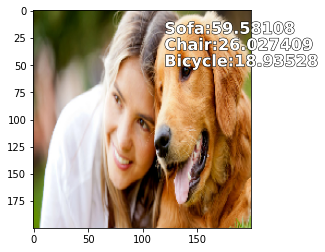

In [60]:
xout=predict_image(model,'Dog-and-Person.jpg')
xout


In [35]:
voc_classes

['Aeroplane',
 'Bicycle',
 'Bird',
 'Boat',
 'Bottle',
 'Bus',
 'Car',
 'Cat',
 'Chair',
 'Cow',
 'Diningtable',
 'Dog',
 'Horse',
 'Motorbike',
 'Person',
 'Pottedplant',
 'Sheep',
 'Sofa',
 'Train',
 'Tvmonitor']